# The Virtue of the God-fearing Man

By: Jordan Crawford-O'Banner

Religion is tied deeply into the foundations of human society. From it, we have derived morals, ideologies and entire schools of thought. More often than not, religion is tied to the idea of being a good or moral person. The belief is that if you are a God-fearing person and you follow all of the guidelines set out by your belief system you will be rewarded because you have been a good person. Considering the wide number of religions and ideologies in the world, there is a question of whether or not being a more religious person actually makes you a more moral person. However, it would be irresponsible to presume that I can define whether or not a person's belief or actions make them more moral than another. I will therefore be using moral foundation theory to define what a religious person values most and see how a person who is less religious aligns with those vales. 

We will try to predict the moral values of a religious person by using data from the General Social Survey to correlate a persons views on various issues with how religious they are. We will estimate how religious a person is by how often they attend religious meetings and how fundamentalist they consider their religion. Each of the issues will be categorized according to which of the values within moral foundation theory they appeal to. Moral foundation theory states that all of human moral reasoning stems from six innate, modular foundations.

- Liberty: the power or scope to act as one pleases; opposite of oppression
- Purity: abhorrence for disgusting things, foods, actions; opposite of degradation
- Fairness: rendering justice according to shared rules; opposite of cheating
- Care: cherishing and protecting others; opposite of harm
- Loyalty: standing with your group, family, nation; opposite of betrayal
- Authority: submitting to tradition and legitimate authority; opposite of subversion

First we must import all of the necessary libraries that will help with the calculations and import the data we will need from the General Social Survey

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf
import patsy

gss = pd.read_hdf('gss.hdf5', 'gss')    

There are certain answers from the gss data that is missing from the dataset. The respondents either answered that the question did not apply to them or that they were unable to give an answer. We will remove this data from the gss data by setting them to NaN. 

In [24]:
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

First we will plot a histogram of the number of respondents within each religion to see how many people are in each category. Of the possible answers to the survey: 1 is Protestant, 2 is Catholic, 3 is Jewish, 4 is None, 5 is Other, 6 is Buddhist, 7 is Hindu, 8 is Other eastern religion, 9 is Muslim, 10 is Orthodox Christian, 11 is Christian, 12 is Native American and 13 is Interdenominational

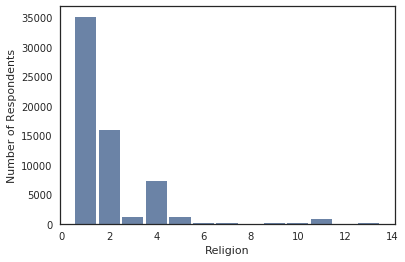

In [25]:
pmf=thinkstats2.Hist(gss['relig'])
thinkplot.Hist(pmf)
plt.xlabel('Religion')
plt.ylabel('Number of Respondents')
thinkplot.show()

The histogram shows that there is far more Protestant respondents than of any other religion, which means that the data may be skewed in towards the specific beliefs of Protestants or the other Christian denominations that make up a majority of the respondents to the survey.

# Interracial Marriage

The first issue that we will look at is interracial marriage. The General Social Survey posed the question, "Do you think there should be laws against marriages between (Negroes/Blacks/African-Americans) and whites?" The issue of interracial marriage covers many moral foundations including: loyalty, liberty,fairness and sanctity. If a respondent favored having a law against interracial marriage then they would value loyalty and sanctity more than liberty and fairness in this situation. They would prefer to uphold the purity of marriage as a traditional practice by only marrying people within their identified group.

First the data needs to be rearrange so that it is more readable and there are no unnecessary values.

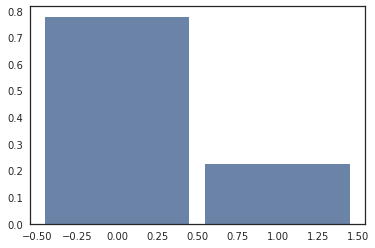

In [50]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['racmar'].replace([0, 8, 9], np.nan, inplace=True)
gss['racmar'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['racmar'])
thinkplot.Hist(pmf)
thinkplot.show()

Creating a PMF of the data shows that a majority of respondents were against a law that banned interracial marriage over the time period which the question was asked. Now lets get a deeper look at how religion plays a factor into these opinions.

First the gss data is grouped by how often each respondent attends a religious meeting. In this dataset zero represents never attending religious meetings and 8 represents attending religious meetings everyday. After that we take the mean of the responses for interracial marriage for each group and plot them. This gives us an idea of how the data relates to the respondents attendance.

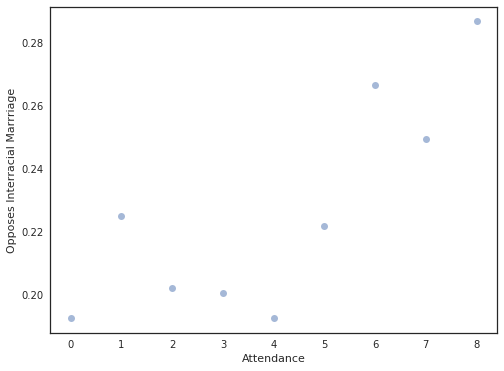

In [51]:
gssReg=gss.groupby('attend')
mean_racmar_by_attendance = gssReg['racmar'].mean()
plt.plot(mean_racmar_by_attendance, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Opposes Interracial Marrriage')
plt.show()

The relationship between attendance and opposing interracial marriage looks to be nonlinear. It appears that the more a person attends religious meetings the more likely they are to oppose interracial marriage. It is understandable that a person more dedicated to their religion would put more value into purity and loyalty whereas people who do not attend any services do not feel the same importance towards being loyal to a group.

To understand the correlation between attendance and opinions on interracial marriage, lets take a linear regression of the two. 

In [52]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('racmar ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     60.87
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           4.19e-27
Time:                        17:11:31   Log-Likelihood:                -15450.
No. Observations:               28585   AIC:                         3.091e+04
Df Residuals:                   28582   BIC:                         3.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2019      0.006     35.671      0.000       0.191       0.213
attend        -0.0051      0.004     -1.448      0.148      -0.012       0.002
attend2        0.0018      0.000      4.244      0.000       0.001       0.003
==============================================================================
Omnibus:                     5117.996   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8390.334
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       2.773   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of the relationship is very low. There are likely more variables that could better predict opinions on this topic, but that is to be expected. I added the nonlinear relationship of attend2, which is all of the values in the attend dataset squared. From this linear regression model we can make a curve based on the predictions made by the model

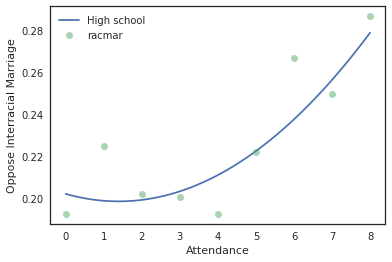

In [53]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['racmar'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Oppose Interracial Marriage')
plt.legend()
plt.show()

The prediction creates a line that mostly fits the the graph of the means that was produced earlier. This shows that the model is pretty accurate to the data that we have in the general social survey. Similarly to the previous graph, we can see that people who attend religious meetings more often support laws against interracial marriage more than those who attend meetings less. Although it is interesting to see that those who rarely attend religious meetings are less likely to support laws against interracial marriage than those who never attend a religious meeting. It is unclear what the cause of this phenomenon it, but we shall see if it continues to be a pattern as we move forward.

Next, we will examine how the fundamentalism of one's religion affect the respondents views on interracial marriage. Fundamentalism is measured on a scale from 1 to 3 where 1 is very fundamentalist and 3 is liberal. Similar to attendance, we will first group the data by the fundamentalism dataset and then take the mean.

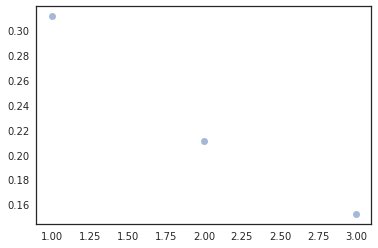

In [54]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

The graph is very linear in compared to the mean graph using attendance as groups. The more fundamentalist a person's religion is the more likely they are to support laws that ban interracial marriage. Lets model the curve and see if we can gain anymore information out of it.

In [55]:
model = smf.ols('racmar ~ fund', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     576.7
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          3.65e-126
Time:                        17:11:34   Log-Likelihood:                -15075.
No. Observations:               27947   AIC:                         3.015e+04
Df Residuals:                   27945   BIC:                         3.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3839      0.007     55.101      0.000       0.370       0.398
fund          -0.0808      0.003    -24.015      0.000      -0.087      -0.074
==============================================================================
Omnibus:                     4758.161   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7496.264
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                       2.700   Cond. No.                         7.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fundamentalism has much better ability to predict opinions on race than the number of religious meetings a respondent attends, but the R-squared value is still very low. A nonlinear function of fund2, which is the fundamentalism dataset squared, to make the model more accurate to the data. Using this model we can then predict a curve that describes the relationship between fundamentalism and interracial marriage.

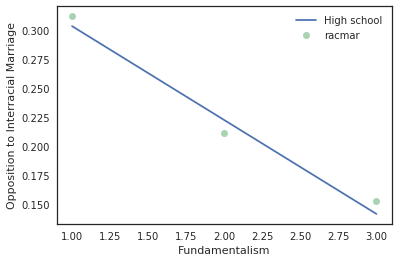

In [56]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Fundamentalism')
plt.ylabel('Opposition to Interracial Marriage')
plt.legend()
plt.show()

The graph confirms the previous analysis that the more fundamentalist a person considers their religion, the more likely they are to support laws against interracial marriage.

Now that we have seen the relationship that attendance and fundamentalism have with interracial marriage, we can see how both together can be effective in predicting a respondent's opinion on interracial marriage.

In [57]:
model = smf.ols('racmar ~ attend + attend2 + fund + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     97.11
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.95e-179
Time:                        17:11:38   Log-Likelihood:                -14802.
No. Observations:               27682   AIC:                         2.962e+04
Df Residuals:                   27672   BIC:                         2.971e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3803      0.010     38.785      0.000       0.361       0.400
C(relig)[T.2.0]     -0.0757      0.006    -12.949      0.000      -0.087      -0.064
C(relig)[T.3.0]     -0.1243      0.018     -6.755      0.000      -0.160      -0.088
C(relig)[T.4.0]     -0.1117      0.011    -10.148      0.000      -0.133      -0.090
C(relig)[T.5.0]      0.3515      0.239      1.473      0.141      -0.116       0.819
C(relig)[T.6.0]  -2.549e-15   1.75e-15     -1.456      0.145   -5.98e-15    8.81e-16
C(relig)[T.7.0]  -3.953e-16   2.77e-16     -1.429      0.153   -9.38e-16    1.47e-16
C(relig)[T.8.0]  -6.384e-16   4.21e-16     -1.517      0.129   -1.46e-15    1.87e-16
C(relig)[T.9.0]  -2.314e-16   1.59e-16     -1.453      0.146   -5.44e-16    8.08e-17
C(relig)[T.10.0]    -0.0207      0.100     -0.206      0.837      -0.217       0.176
C(relig)[T.11.0]    -0.2319      0.056     -4.112      0.000      -0.342      -0.121
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0211      0.004     -5.505      0.000      -0.029      -0.014
attend2              0.0030      0.000      6.472      0.000       0.002       0.004
fund                -0.0530      0.004    -13.069      0.000      -0.061      -0.045
==============================================================================
Omnibus:                     4591.777   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7109.781
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       2.683   Cond. No.                     1.53e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-65. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we have used attendance, fund and their nonlinear forms as explanatory variables in the regression. We have also added the religion denomination of the respondent as a categorical variable. This will show us how different belief systems compare to one another and possibly correct for the large number of Protestants within our pool of respondents. This model has a higher R-squared value than either of the variables alone, which means the predicted curve will be more accurate. Here we plot the predicted curve of Protestants, Catholics, Jews, and people who identify as having no religion against the mean interracial marriage opinion grouped by income.

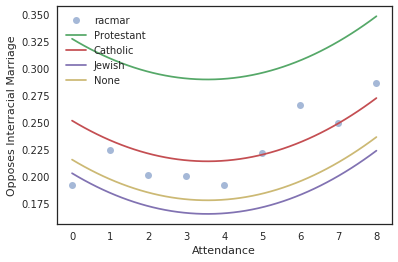

In [58]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 1)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Attendance')
plt.ylabel('Opposes Interracial Marriage')
plt.legend()
plt.show()

This shows that Protestants are the most likely to  favor the ban on interracial marriage while Jews and None are the least likely. This means that Protestants value purity and loyalty more than any of the other graphed groups, while Jews favor liberty and fairness the most. This graph also interestingly shows that people who attend religious meetings a more middling amount are less likely to support the ban on interracial marriage than either of the other extremes. Therefore people who attend services only a middling amount tend to value liberty and fairness more than their peers in any religion.

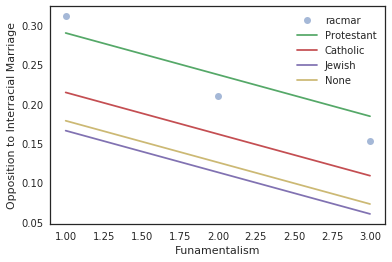

In [59]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(4, 4)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Funamentalism')
plt.ylabel('Opposition to Interracial Marriage')
plt.legend()
plt.show()

# Abortion

The next issue we will look at is abortion. The General Social Survey poses the question, "Please tell me whether or not you think it should be possible for a pregnant woman to obtain a legal abortion if the woman wants it for any reason?" The issue of abortion always involves sanctity, as it involves the belief that someone may or may not be killing a living thing. As the question is posed, there is also the involvement of liberty, because the woman would be able to have an abortion for whatever reason they wanted. The question of whether abortion should be legal or not has been linked to religious belief many times in the past, which may mean there will be a higher correlation between the data and the explanatory variable we have been using. Based upon the previous issue of interracial marriage, we would expect that a more religious respondent would be more likely to oppose abortion because they value purity more than liberty, while less religious respondents are in favor of abortion because they value liberty more than sanctity.

We once again need to edit the data in the same way we did for the interracial marriage data.

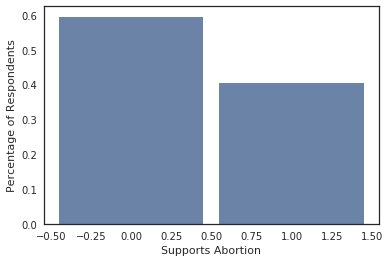

In [60]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['abany'].replace([0, 8, 9], np.nan, inplace=True)
gss['abany'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['abany'])
thinkplot.Hist(pmf)
plt.xlabel('Supports Abortion')
plt.ylabel('Percentage of Respondents')
thinkplot.show()

We first create a PMF of the data so that we can see how many respondents supported and opposed abortion over the time period the question was asked in the survey. The majority of the respondents opposed abortion for any reason.

Next we will group the data set by attendance and plot the means in order to understand the relationship between attendance and support of abortion.

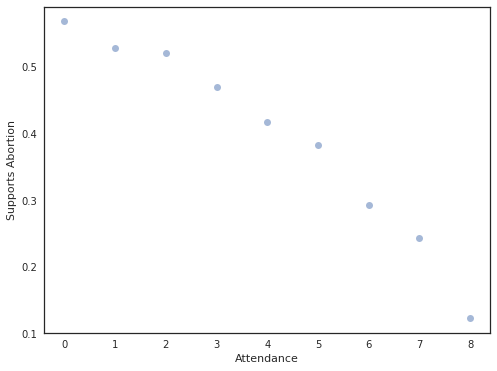

In [61]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Supports Abortion')
plt.show()

It appears that the relationship between attendance and abortion is pretty linear. The graph suggests that people who never attend religious services are more likely to support abortion than people who attend any religious services, and the more often a respondent attends religious services the less likely they are to support abortion.

Next we will use linear regression to model the relationship between abortion and attendance to analyze the correlation between attendance and abortion. There is a nonlinear value in the linear regression equation because the graph above as a slight curve, so the model may be more accurate by adding a nonlinear variable

In [70]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('abany ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1593.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:30:38   Log-Likelihood:                -23226.
No. Observations:               35000   AIC:                         4.646e+04
Df Residuals:                   34997   BIC:                         4.648e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5631      0.005    103.181      0.000       0.552       0.574
attend        -0.0148      0.004     -4.230      0.000      -0.022      -0.008
attend2       -0.0047      0.000    -10.760      0.000      -0.006      -0.004
==============================================================================
Omnibus:                   182074.578   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4131.291
Skew:                           0.305   Prob(JB):                         0.00
Kurtosis:                       1.432   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation between abortion and attendance is rather high, which shows that attendance has decent prediction power for whether or not a respondent would support abortion. Next, we will graph the the curve generated by the linear regression to see how accurate the model is.

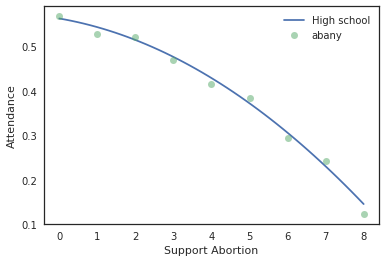

In [71]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Support Abortion')
plt.ylabel('Attendance')
plt.legend()
plt.show()

The model matches the the mean graph exactly and confirms the fact that people who attend fewer services are more likely to support abortion.

Next we will do the same analysis for fundamentalism.

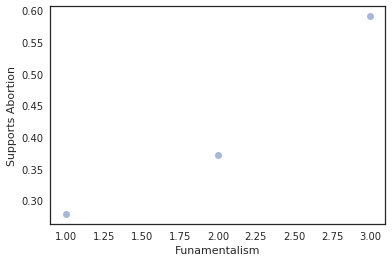

In [72]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Funamentalism')
plt.ylabel('Supports Abortion')
plt.show()

This is the mean graph for abortion when the gss data is grouped by fundamentalism. The graph shows that there is mostly linear relationship between fundamentalism and abortion. The more fundamental respondents support abortion less than the respondents who consider their religions to be more liberal.

Next we will create the linear regression model.

In [77]:
model = smf.ols('abany ~ fund', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2045.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:32:15   Log-Likelihood:                -22985.
No. Observations:               33978   AIC:                         4.597e+04
Df Residuals:                   33976   BIC:                         4.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1009      0.007     14.184      0.000       0.087       0.115
fund           0.1537      0.003     45.216      0.000       0.147       0.160
==============================================================================
Omnibus:                   164246.639   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4502.860
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                       1.386   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation between fundamentalism and abortion is also higher than expected, but it has less predicting power than the respondent's attendance of religious services. Next we will graph the predicted curve from the linear regression.

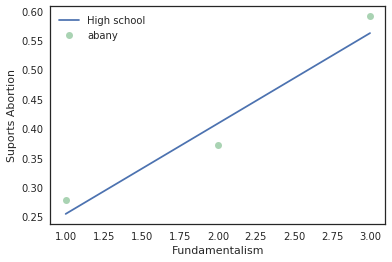

In [78]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Fundamentalism')
plt.ylabel('Suports Abortion')
plt.legend()
plt.show()

The predicted curve fits the graph very well, which confirms the previous analysis that people who identify their religions as being less fundamentalist religions are more likely to support abortion for any reason a woman wants.

Now we can use all of our parameters at once to predict the support of abortion. First we will create a linear regression model using all of the parameters. The religion of the respondent is added as a categorical variable so that we can compare how different religions stand on these issues and the morals they value.

In [79]:
model = smf.ols('abany ~ attend + attend2 + fund + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     494.9
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:                -21700.
No. Observations:               33720   AIC:                         4.342e+04
Df Residuals:                   33710   BIC:                         4.350e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3273      0.010     33.267      0.000       0.308       0.347
C(relig)[T.2.0]     -0.0325      0.006     -5.360      0.000      -0.044      -0.021
C(relig)[T.3.0]      0.2474      0.019     13.147      0.000       0.211       0.284
C(relig)[T.4.0]      0.0556      0.010      5.333      0.000       0.035       0.076
C(relig)[T.5.0]     -0.0961      0.206     -0.466      0.641      -0.500       0.308
C(relig)[T.6.0]  -4.848e-17   2.53e-16     -0.192      0.848   -5.44e-16    4.47e-16
C(relig)[T.7.0]   3.068e-17   1.05e-17      2.920      0.004    1.01e-17    5.13e-17
C(relig)[T.8.0]  -1.501e-17    3.5e-17     -0.429      0.668   -8.36e-17    5.35e-17
C(relig)[T.9.0]   1.061e-17   3.77e-18      2.813      0.005    3.22e-18     1.8e-17
C(relig)[T.10.0]     0.2020      0.056      3.619      0.000       0.093       0.311
C(relig)[T.11.0]     0.0240      0.023      1.036      0.300      -0.021       0.070
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend               0.0069      0.004      1.817      0.069      -0.001       0.014
attend2             -0.0060      0.000    -13.186      0.000      -0.007      -0.005
fund                 0.0898      0.004     21.673      0.000       0.082       0.098
==============================================================================
Omnibus:                   271545.596   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3449.993
Skew:                           0.328   Prob(JB):                         0.00
Kurtosis:                       1.577   Cond. No.                     4.41e+35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now that we are using many variables the r-squared value is very high, which means our explanatory variables are very good predictors of whether or not someone will support abortion. Next we will plot this against the mean graph for attendance and funds. We will plot the predicted curves for Protestants, Catholics, Jews and people who identified as not having a religion.

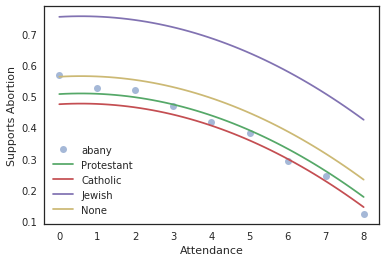

In [80]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Attendance')
plt.ylabel('Supports Abortion')
plt.legend()
plt.show()

When plotting against the mean graph for attendance we can see that the graphs show the same shape as the mean graph, which shows that our predicted curve is accurate. It appears that our previous analysis holds true for every religion as the people who attend more religious meetings tend to support abortion less than the people who attend no meetings at all. The graph shows that Jewish people are far more likely than any other group to support abortion, while Catholics oppose abortion the most. Interestingly enough, people who identify as not having a religion are far closer to the beliefs of Protestants and Catholics than Jewish people. Next we will compare the predict curves to the mean graph for fundamentalism.

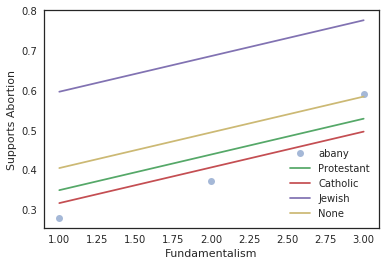

In [81]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(4, 4)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Fundamentalism')
plt.ylabel('Supports Abortion')
plt.legend()
plt.show()

#you have been hacked, i'm sorry for you loss

The predicted curves do not fit the graph very well although they do keep the same general downward trend. This may mean that the curve may not be incredibly accurate. This graph shows what we had observed before, which is that the more liberal a person considers their religion the more they tend to support abortion, while people who consider their religion more fundamentalist tend to oppose abortion. Similarly to the attendance graph above, Jewish people support abortion the most while catholics support abortion the least.

These two graph have supported our findings that religious people tend to value purity more than liberty. However, it appears that among the religions we have looked at Jewish people value liberty and fairness more than Catholics, Protestants and people who say they have no religion.

# Marijuana

Drug use has been considered a very important moral issue throughout the United State, especially in the modern era. The General Social Survey asked its respondents, "Do you think the use of marijuana should be made legal or not?" The respondents answered 1 if they agreed and 0 if they disagreed. The use of marijuana has been considered an immoral act until very recently and so there has been some debate over whether the drug is okay to use in any setting whether it be medical or recreational. This issue involves care and liberty.  It involves care because it is a worry about the way drug use can affect the health of a person and liberty because it involves being able to do an act as long as one knows the potential dangers that can come of it.

As with the previous issues, we first need to clean the data.

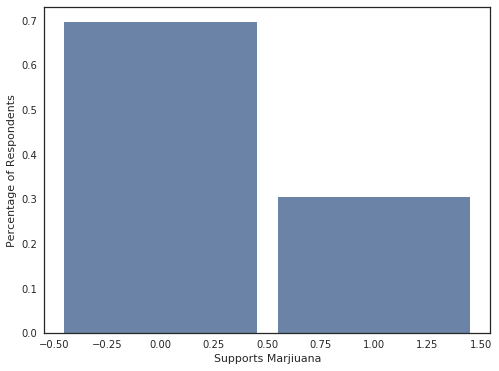

In [83]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['grass'].replace([0, 8, 9], np.nan, inplace=True)
gss['grass'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['grass'])
thinkplot.Hist(pmf)
plt.xlabel('Supports Marjiuana')
plt.ylabel('Percentage of Respondents')
thinkplot.show()

By taking a PMF of the data, we can see that a majority of the respondents to this question have disagreed and believe that marijuana should not be made legal. Next we will look at the mean of the marijuana data grouped by attendance.

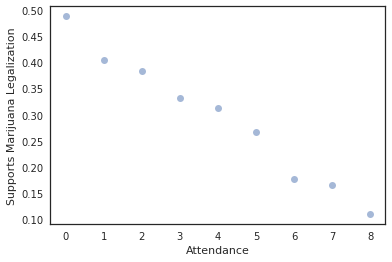

In [85]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Supports Marijuana Legalization')
plt.show()

Unlike what we have previously seen, the attendance and support for marijuana legalization are linearly related to one another. People who do not attend church are more likely to support the legalization of marijuana than people who go to church very often. Now we  have enough information to create a linear regression model of the relationship between marijuana legalization and attendance. The nonlinear variable will not be added this time because the plot appears to be very linear.

In [88]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('grass ~ attend', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2766.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:53:06   Log-Likelihood:                -21738.
No. Observations:               35877   AIC:                         4.348e+04
Df Residuals:                   35875   BIC:                         4.350e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4772      0.004    118.428      0.000       0.469       0.485
attend        -0.0453      0.001    -52.595      0.000      -0.047      -0.044
==============================================================================
Omnibus:                    18670.157   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5150.744
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                       1.888   Cond. No.                         8.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has a pretty good R-squared value for a value that you would not expect to have much correlation with an issue like marijuana use. Now that we have a model we can predict the curve and plot it against the mean graph to see how accurate it is.

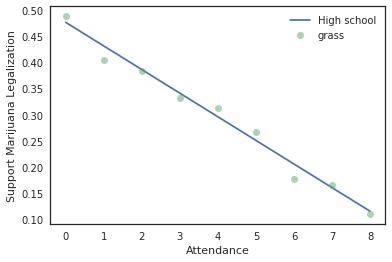

In [89]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Support Marijuana Legalization')
plt.legend()
plt.show()

The model seems to be accurate and describe the data well enough to confirm our prediction that people who go to religious services less often are more likely to support marijuana legalization. 

Now we can analyze how fundamentalism relates to support of marijuana.

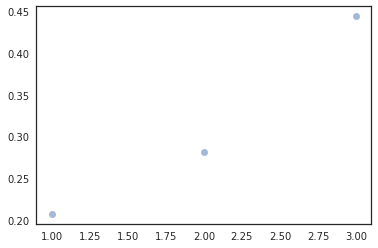

In [39]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

The mean graph of marijuana legalization support when grouped by fundamentalism is also linear.

In [90]:
gss['fund2']= gss['fund']**2
model = smf.ols('grass ~ fund', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.01e-285
Time:                        22:06:07   Log-Likelihood:                -21550.
No. Observations:               34723   AIC:                         4.310e+04
Df Residuals:                   34721   BIC:                         4.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0732      0.007     10.936      0.000       0.060       0.086
fund           0.1167      0.003     36.465      0.000       0.110       0.123
==============================================================================
Omnibus:                    22594.090   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5820.552
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                       1.855   Cond. No.                         6.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression model shows that fundamentalism has a low correlation value with the support of marijuana legalization support. Fundamentalism also only causes small changes in how people feel about marijuana legalization.

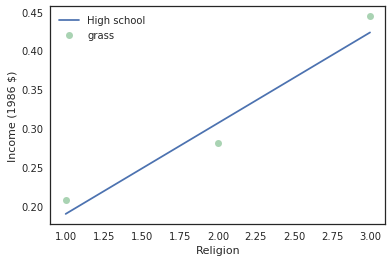

In [91]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

The predicted curve created from the linear regression model fits the mean graph very well, which shows that it is accurate. The respondents to categorize their religion as being fundamentalist tend to be less likely to support the legalization of marijuana.

Using the information we have gathered we can now create a model using the variable we have found are useful.

In [92]:
model = smf.ols('grass ~ attend + fund + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     488.2
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:49:04   Log-Likelihood:                -20193.
No. Observations:               34450   AIC:                         4.040e+04
Df Residuals:                   34441   BIC:                         4.048e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3342      0.009     38.774      0.000       0.317       0.351
C(relig)[T.2.0]      0.0442      0.006      7.872      0.000       0.033       0.055
C(relig)[T.3.0]      0.1760      0.018      9.934      0.000       0.141       0.211
C(relig)[T.4.0]      0.2239      0.009     23.731      0.000       0.205       0.242
C(relig)[T.5.0]      0.0761      0.131      0.580      0.562      -0.181       0.333
C(relig)[T.6.0]  -5.148e-16   7.66e-16     -0.672      0.502   -2.02e-15    9.87e-16
C(relig)[T.7.0]   1.518e-16   1.97e-16      0.770      0.441   -2.35e-16    5.38e-16
C(relig)[T.8.0]  -3.939e-16   4.44e-16     -0.887      0.375   -1.26e-15    4.77e-16
C(relig)[T.9.0]           0          0        nan        nan           0           0
C(relig)[T.10.0]     0.1612      0.062      2.583      0.010       0.039       0.284
C(relig)[T.11.0]     0.1760      0.023      7.628      0.000       0.131       0.221
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0326      0.001    -34.194      0.000      -0.034      -0.031
fund                 0.0244      0.004      6.308      0.000       0.017       0.032
==============================================================================
Omnibus:                     7443.834   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.277
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       2.099   Cond. No.                     2.08e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-69. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Using both fundamentalism and attendance together raises the correlation value dramatically. Although it appears that neither variable creates a huge change in a person's opinion on the legalization of marijuana. 

We once again graph the predicted curves versus the mean graph for both fundamentalism and attendance. We are still only putting plots for Protestantism, Catholicism, Judaism, and people who identify as having no religion.

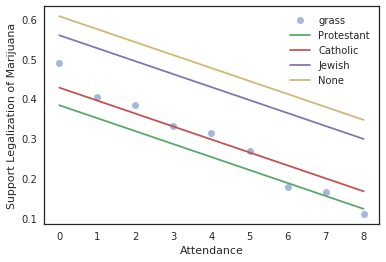

In [95]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Attendance')
plt.ylabel('Support Legalization of Marijuana')
plt.legend()
plt.show()

The predicted curves seem to fit the graph well, but the slope of the predicted curves are shallower than of the plotted mean values. The predicted curve still shows that less attendance to religious meetings is related to a greater chance of supporting marijuana legalization. People who identify as having no religion are most likely to support the legalization of marijuana while Protestants are most like to not support the legalization of marijuana.

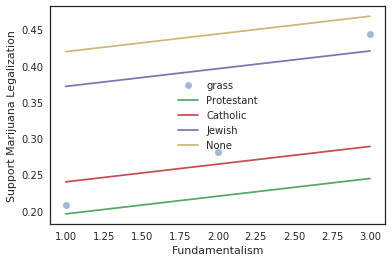

In [97]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(5, 5)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Fundamentalism')
plt.ylabel('Support Marijuana Legalization')
plt.legend()
plt.show()

This plot shows the same data as graphs we have seen before. The people who identify their religion as being more fundamentalist  are more likely to not support the legalization of marijuana. Similar to the  previous, the graph above shows that people who identify as not having a religion are most likely to support marijuana legalization, while people who are Protestant are least likely to support marijuana legalization.

From this issue we can gather that people who are more religious are more likely to value care more than liberty because they are more likely to oppose the legalization of a drug they may think is dangerous to use. People who are less religious are more likely to value liberty more than care because they support the legalization of the drug because they believe that people should be able to use the drug if they know the risks.

# Women in Politics

The General Social Survey poses the question, "Tell me if you agree or disagree with this statement: Most men are better suited emotionally for politics than are most women." This is an issue of fairness and authority. It is an issue of fairness because

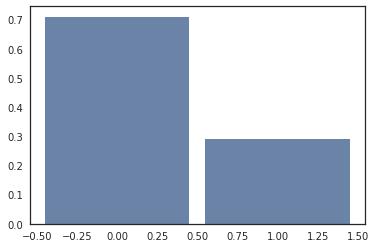

In [45]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['fepol'].replace([0, 8, 9], np.nan, inplace=True)
gss['fepol'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['fepol'])
thinkplot.Hist(pmf)
thinkplot.show()

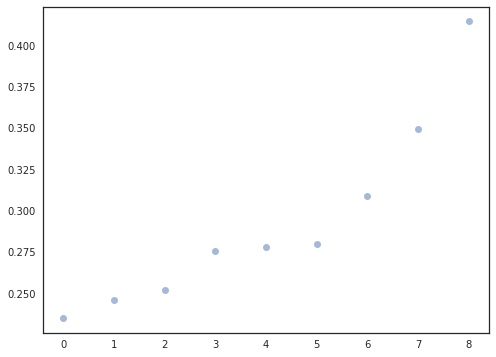

In [46]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [47]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('fepol ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     215.1
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.63e-93
Time:                        15:57:10   Log-Likelihood:                -20357.
No. Observations:               32708   AIC:                         4.072e+04
Df Residuals:                   32705   BIC:                         4.075e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2408      0.005     45.516      0.000       0.230       0.251
attend        -0.0016      0.003     -0.473      0.636      -0.008       0.005
attend2        0.0026      0.000      5.974      0.000       0.002       0.003
==============================================================================
Omnibus:                    17702.950   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6178.719
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                       1.890   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

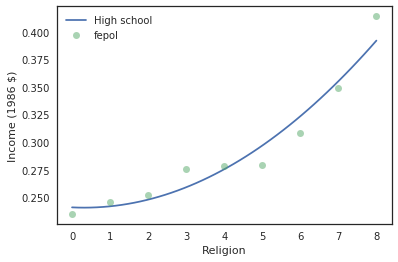

In [48]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

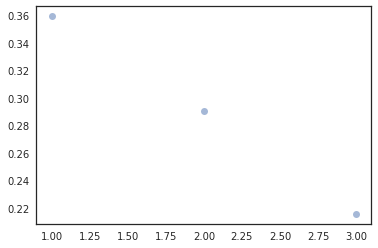

In [49]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [50]:
gss['fund2']= gss['fund']**2
model = smf.ols('fepol ~ fund + fund2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           2.09e-99
Time:                        15:57:11   Log-Likelihood:                -19765.
No. Observations:               31738   AIC:                         3.954e+04
Df Residuals:                   31735   BIC:                         3.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4216      0.019     22.532      0.000       0.385       0.458
fund          -0.0588      0.021     -2.853      0.004      -0.099      -0.018
fund2         -0.0033      0.005     -0.644      0.520      -0.013       0.007
==============================================================================
Omnibus:                    18484.423   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5943.897
Skew:                           0.899   Prob(JB):                         0.00
Kurtosis:                       1.877   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

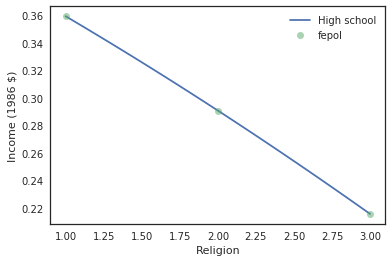

In [51]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [52]:
results= smf.ols('fepol ~ attend + attend2 + fund + fund2 + C(relig)', data=gss).fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     75.60
Date:                Sun, 07 Apr 2019   Prob (F-statistic):          4.75e-154
Time:                        15:57:11   Log-Likelihood:                -19476.
No. Observations:               31511   AIC:                         3.897e+04
Df Residuals:                   31500   BIC:                         3.907e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3070      0.026     11.884      0.000       0.256       0.358
C(relig)[T.2.0]     -0.0551      0.008     -6.808      0.000      -0.071      -0.039
C(relig)[T.3.0]     -0.0421      0.019     -2.226      0.026      -0.079      -0.005
C(relig)[T.4.0]     -0.0507      0.011     -4.612      0.000      -0.072      -0.029
C(relig)[T.5.0]      0.2931      0.201      1.458      0.145      -0.101       0.687
C(relig)[T.6.0]   1.934e-16   1.85e-16      1.044      0.297    -1.7e-16    5.57e-16
C(relig)[T.7.0]   7.799e-17    6.4e-17      1.219      0.223   -4.75e-17    2.03e-16
C(relig)[T.8.0]    1.23e-16   8.66e-17      1.421      0.155   -4.67e-17    2.93e-16
C(relig)[T.9.0]  -1.135e-17   2.01e-17     -0.565      0.572   -5.07e-17     2.8e-17
C(relig)[T.10.0]     0.0659      0.062      1.071      0.284      -0.055       0.187
C(relig)[T.11.0]    -0.0891      0.024     -3.713      0.000      -0.136      -0.042
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0144      0.004     -3.823      0.000      -0.022      -0.007
attend2              0.0034      0.000      7.354      0.000       0.002       0.004
fund                 0.0476      0.030      1.568      0.117      -0.012       0.107
fund2               -0.0236      0.008     -3.039      0.002      -0.039      -0.008
==============================================================================
Omnibus:                    16083.742   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5721.412
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       1.900   Cond. No.                     2.51e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.86e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

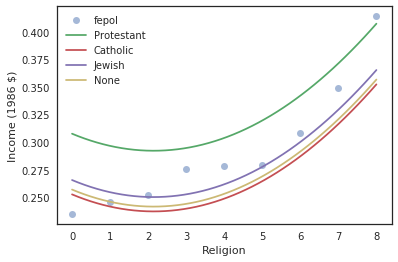

In [53]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

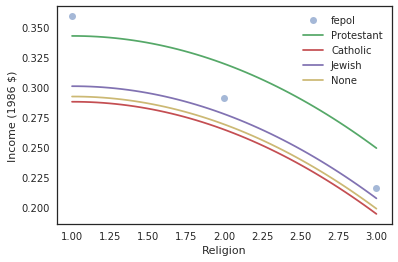

In [54]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(5, 5)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()